Comparing and observing the efficiency and accuracy of various kernel svms on the IRIS dataframe

Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

Using pandas to read the dataset

In [ ]:
df = sns.load_dataset("iris")

In [ ]:
df.shape


(150, 5)

In [ ]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [ ]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
df.corr()

,sepal_length,sepal_width,petal_length,petal_width
sepal_length,1.000000,-0.117570,0.871754,0.817941
sepal_width,-0.117570,1.000000,-0.428440,-0.366126
petal_length,0.871754,-0.428440,1.000000,0.962865
petal_width,0.817941,-0.366126,0.962865,1.000000


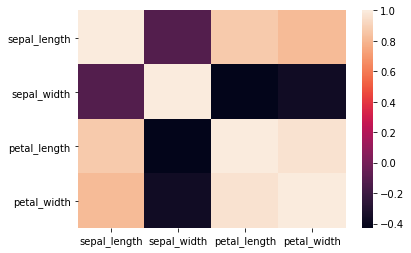

In [ ]:
sns.heatmap(df.corr(), annot= None)

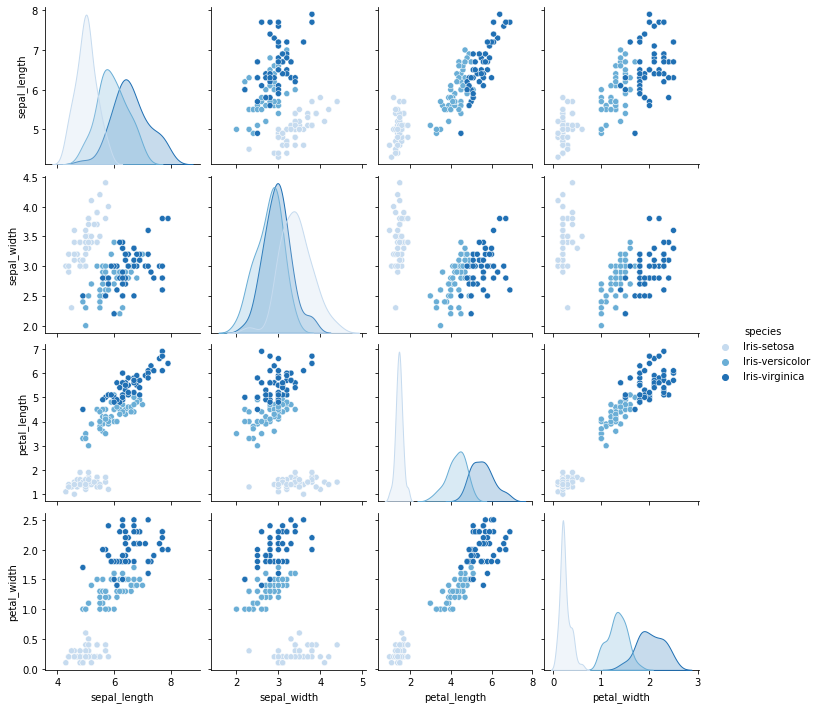

In [ ]:
sns.pairplot(data= df, hue= 'species', palette='Blues')

In [ ]:
x= df.iloc[:, :-1].values
y= df.iloc[:, -1].values

Data preprocessing


In [ ]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(x,y, test_size= 0.25, random_state= 0)

#Training the model using the Gaussian Kernel

In [ ]:
from sklearn.svm import SVC
classifier= SVC(kernel= 'rbf')
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'versicolor']]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
 accuracy_score(y_test, y_pred)

0.9736842105263158

The Gaussian Kernel gives an accuracy of 0.97, with one misclassification.

#Training the model using Polynomial Kernel

In [ ]:
from sklearn.svm import SVC
classifier= SVC(kernel= 'poly', degree= 6)
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=6, gamma='scale', kernel='poly',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['setosa' 'setosa']
 ['setosa' 'setosa']
 ['versicolor' 'versicolor']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['versicolor' 'versicolor']
 ['setosa' 'setosa']
 ['virginica' 'versicolor']]


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[13  0  0]
 [ 0 15  1]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        13
  versicolor       1.00      0.94      0.97        16
   virginica       0.90      1.00      0.95         9

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38



In [ ]:
accuracy_score(y_test, y_pred)

0.9736842105263158

Polynomial kernel works efficiently classifying data in either of the three given species, with only one misclassification

#Training the model using the Sigmoid Kernel

In [ ]:
from sklearn.svm import SVC
classifier = SVC(kernel='sigmoid')
classifier.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='sigmoid',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [ ]:
y_pred= classifier.predict(x_test)

In [ ]:
y_pred = classifier.predict(x_test)
print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[['virginica' 'virginica']
 ['virginica' 'versicolor']
 ['virginica' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'setosa']
 ['virginica' 'versicolor']
 ['virginica' 'versicolor']
 ['virginica' 'versicolor']
 ['virginica' 'virginica']
 ['virginica' 'versicolor']
 ['virginica' 'versicolor']
 ['virginica' 'versicolor']
 ['virginica' 'versicolor']
 ['virginica' 'setosa']
 ['virginica' 'versicolor']
 ['virginica' 'versicolor']
 ['virginica' 'setosa']
 ['virginica' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'versicolor']
 ['virginica' 'setosa']
 ['virginica' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'setosa']
 ['virginica' 'setosa']
 ['virginica' 'versicolor']
 ['virginica' 'versicolor']
 ['virginica' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'versicolor']
 ['virginica' 'setosa']
 ['virginica' 'virginica']
 ['virginica' 'virginica']
 ['virginica' 'versicolor']
 ['virginica' 'setosa']
 ['virginica' 'versicolor

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[ 0  0 13]
 [ 0  0 16]
 [ 0  0  9]]
              precision    recall  f1-score   support

      setosa       0.00      0.00      0.00        13
  versicolor       0.00      0.00      0.00        16
   virginica       0.24      1.00      0.38         9

    accuracy                           0.24        38
   macro avg       0.08      0.33      0.13        38
weighted avg       0.06      0.24      0.09        38



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [ ]:
accuracy_score(y_test, y_pred)

0.23684210526315788

Sigmoid kernel is clearly not efficient since it's mainly efficient for Binary Classification, unlike the given dataset